Classification: Naïve Bayes Dataset: pima- 
indians-diabetes.csv 
Use probabilistic approach to implement Classifier model. Evaluate the 
performance of the model.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
data = pd.read_csv('pima-indians-diabetes.csv')

# Display the first few rows of the dataset to understand its structure
data


,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
762,10,101,76,48,180,32.9,0.171,63,0
763,2,122,70,27,0,36.8,0.340,27,0
764,5,121,72,23,112,26.2,0.245,30,0
765,1,126,60,0,0,30.1,0.349,47,1


In [3]:
# Check for missing values in the dataset
print(data.isnull().sum())


6        0
148      0
72       0
35       0
0        0
33.6     0
0.627    0
50       0
1        0
dtype: int64


In [ ]:
# Split the dataset into features and target
X = data.drop('1', axis=1)  # Features (all columns except '1' here 1 is outcome')
y = data['1']  # Target variable (Outcome)


In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing data
print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')


Training data shape: (613, 8)
Testing data shape: (154, 8)


In [9]:
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the Naive Bayes model on the training data
nb_classifier.fit(X_train, y_train)


GaussianNB()

In [10]:
# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)


In [11]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Generate a classification report (precision, recall, f1-score)
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 74.68%
Confusion Matrix:
[[82 15]
 [24 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        97
           1       0.69      0.58      0.63        57

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



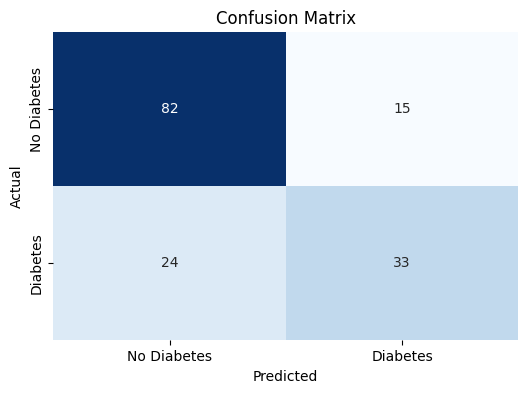

In [12]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
